In [1]:
import pandas as pd
import numpy as np


In [2]:
drug_data = pd.read_pickle("drug_related.pkl")


In [3]:
demo_data = pd.read_csv("improv_demo.csv")
demo_data.head

<bound method NDFrame.head of     city_council_district  percent_white  percent_black
0                       1           45.1            4.0
1                       2           56.2            6.4
2                       3           67.2            4.7
3                       4           77.5            3.0
4                       5           77.8            3.3
5                       6           72.1            5.8
6                       7           19.4           26.2
7                       8           19.8           22.4
8                       9           24.0           47.5
9                      10            9.2            6.3
10                     11           32.8           18.5
11                     12            4.2           66.9
12                     13           39.7           11.7
13                     14            2.7           21.0
14                     15            4.9           24.9
15                     16            1.3           38.6
16                

In [4]:
dict_demo = dict(zip(demo_data["city_council_district"].values,demo_data[["percent_white","percent_black"]].values ))

In [5]:
selecteddata = drug_data[['citycouncildistrict','dispatch_response_seconds_qy',
                          'incident_response_seconds_qy', 'incident_travel_tm_seconds_qy']]
selecteddata.dropna(axis=0, inplace=True)


C:\Users\vogeld2\AppData\Local\Temp\ipykernel_24528\4213029990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecteddata.dropna(axis=0, inplace=True)


In [6]:
selecteddata["council_white_rate"] = selecteddata.apply(
    lambda row: dict_demo[(row["citycouncildistrict"])][0], axis=1)


C:\Users\vogeld2\AppData\Local\Temp\ipykernel_24528\4131297914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecteddata["council_white_rate"] = selecteddata.apply(


In [7]:
selecteddata["council_black_rate"] = selecteddata.apply(
    lambda row: dict_demo[(row["citycouncildistrict"])][1], axis=1)

C:\Users\vogeld2\AppData\Local\Temp\ipykernel_24528\2354360596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecteddata["council_black_rate"] = selecteddata.apply(


In [8]:
selecteddata["majoritywhite"] = selecteddata.apply(lambda row: 1 if row["council_white_rate"] > 50.0 else 0, axis= 1)

C:\Users\vogeld2\AppData\Local\Temp\ipykernel_24528\3528962972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecteddata["majoritywhite"] = selecteddata.apply(lambda row: 1 if row["council_white_rate"] > 50.0 else 0, axis= 1)


In [9]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(selecteddata, test_size=0.2)
trainx = train[['dispatch_response_seconds_qy',
                      'incident_response_seconds_qy', 'incident_travel_tm_seconds_qy']]
trainy = train["majoritywhite"]
testx = test[['dispatch_response_seconds_qy',
                      'incident_response_seconds_qy', 'incident_travel_tm_seconds_qy']]
testy = test["majoritywhite"]

In [12]:

clf = make_pipeline(StandardScaler(),svm.SVC(max_iter=2000))
clf.fit(trainx, trainy)


c:\Users\vogeld2\miniconda3\envs\IMT-Agent\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(max_iter=2000))])

In [13]:
clf.score(testx, testy, sample_weight=None)


0.485033192085349

In [14]:
sig = make_pipeline(StandardScaler(),svm.SVC(max_iter=2000, kernel="sigmoid"))
sig.fit(trainx, trainy)

c:\Users\vogeld2\miniconda3\envs\IMT-Agent\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid', max_iter=2000))])

In [15]:
sig.score(testx, testy, sample_weight=None)


0.5986580250530573

In [16]:
poly = make_pipeline(StandardScaler(),svm.SVC(max_iter=2000, kernel="poly"))
poly.fit(trainx, trainy)

c:\Users\vogeld2\miniconda3\envs\IMT-Agent\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly', max_iter=2000))])

In [17]:
poly.score(testx,testy, sample_weight=None)

0.34563357938589284

Is it possible to predict if a district is majority white or not based on their response times?

In [20]:
kernels = ["rbf","sigmoid","poly"]
accuracy = [0.485033192085349, 0.5986580250530573, 0.34563357938589284]


In [18]:
import matplotlib.pyplot as plt

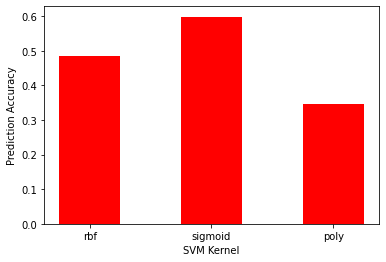

In [21]:
plt.bar(kernels, accuracy, color ='red',
        width = 0.5)
plt.xlabel("SVM Kernel")
plt.ylabel("Prediction Accuracy")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier



In [25]:
rfc = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
rfc.fit(trainx, trainy)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [27]:
trees = [100]
scores = []
scores.append(rfc.score(testx, testy))


In [29]:
for i in [10, 25, 50]:
    trees.append(i)
    rfc = make_pipeline(
        StandardScaler(), RandomForestClassifier(n_estimators=i))
    rfc.fit(trainx, trainy)
    scores.append(rfc.score(testx, testy))




In [41]:
trees.append(75)
rfc = make_pipeline(
    StandardScaler(), RandomForestClassifier(n_estimators=75))
rfc.fit(trainx, trainy)
scores.append(rfc.score(testx, testy))

In [38]:
trees = [100,10,25,50]
scores = [0.6042460144487398, 0.6036529158300165, 0.6033456478709188, 0.605182109859014]

[100, 10, 25, 50, 75]
[0.6042460144487398, 0.6036529158300165, 0.6033456478709188, 0.605182109859014, 0.603502854733713]


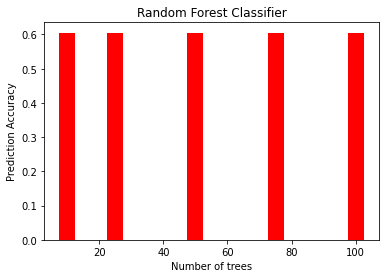

In [42]:
print(trees)
print(scores)
plt.bar(trees, scores, color ='red',width = 5)
plt.xlabel("Number of trees")
plt.ylabel("Prediction Accuracy")
plt.title("Random Forest Classifier")
plt.show()